# BE noté -- Fondations statistiques du Machine Learning

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 1.1

Les données d'apprentissage sont dans les fichiers *E1_sensor_vals.csv* et *E1_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [251]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


#X=...

#Y=...

#TODO



### QUESTION 1.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 1.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée dans ce contexte ?


#### QUESTION 1.2.2

Evaluez alors la qualité des prédictions en quantifiant les erreurs de prédiction au carré. Quelle variable vous semble être la plus pertinente pour prédire le niveau de stress et pourquoi ?


#### QUESTION 1.2.3

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.



### QUESTION 1.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 1.3.1

**Stratégie 1** : Définissez une première procédure pour détecter automatiquement les deux données aberrantes dans un jeu de données. On utilisera pour cela les distances de Cook.

#### QUESTION 1.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.



### QUESTION 1.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 1.4.1

Quel traitement préalable allez-vous effectuer sur les données capteur et pourquoi ?


#### QUESTION 1.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 1.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



## Exercice 2

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. A l'aide de modèles de régression linéaire et de tests statistiques, nous allons alors évaluer :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

Afin de résoudre le problème, deux hypothèses seront effectuées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution des erreurs de ce modèle est supposée suivre une loi Normale centrée.


La démarche pour répondre à ces questions sera commentée dans le notebook rendu, quels qu'en soient ses résultats.


Conseil : Avant de définir une stratégie de résolution, il est recommandé de visualiser les données de *E2_Efficiency_Obs.csv* en distinguant bien les observations obtenues dans les groupes *Brand_1* et *Brand_2*.



In [252]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

dataframe=pandas.read_csv("./E2_Efficiency_Obs.csv",sep=',')

In [253]:
dataframe.head()

,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


/tmp/ipykernel_870/3214176059.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


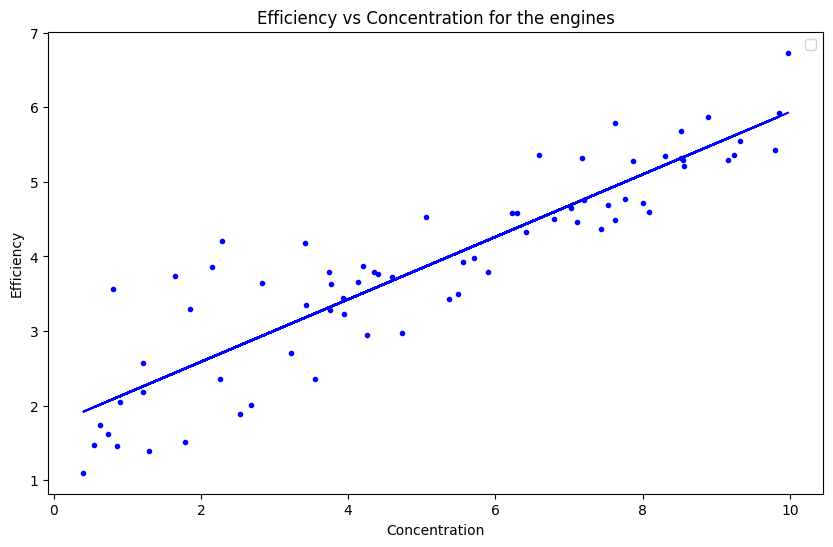

R²: 0.81
Selon le modèle, l'efficacité du moteur sans produit est :  [1.74942932]
Selon le modèle, l'efficacité du moteur avec une concentration de 10 en produit est :  [5.93667368]


In [254]:
from sklearn.metrics import mean_squared_error, r2_score

x = np.array(dataframe['Concentration'])
y = np.array(dataframe['Efficiency'])

# Création de la regression linéaire pour brand_1
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
y_pred = lr.predict(x[:, np.newaxis])

# Création de la figure et des axes
plt.figure(figsize=(10, 6))

# representation du resultat
plt.plot(x, y, 'b.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')

# Ajouter des légendes et des titres
plt.title('Efficiency vs Concentration for the engines')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()

# Afficher le graphique
plt.show()

# Évaluation du modèle
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.2f}")

# Test du modèle en 2 valeurs
print("Selon le modèle, l'efficacité du moteur sans produit est : ", lr.predict([[0]]))
print("Selon le modèle, l'efficacité du moteur avec une concentration de 10 en produit est : ", lr.predict([[10]]))

In [255]:
# Interprétation : 
# Selon la représentation de l'efficacité en fonction de la concentration du produit 
# il semble que le produit ait un effet sur le rendement comme le montre l'inclinaison 
# significative de la regression linéaire. Notre modèle prédit qu'avec une concentration 
# de 10, l'efficacité est 3 fois supérieure que sans produit. Notre modèle offre un R² 
# de 0.81, la variance dans les données est donc globalement bien expliquée par le modèle.

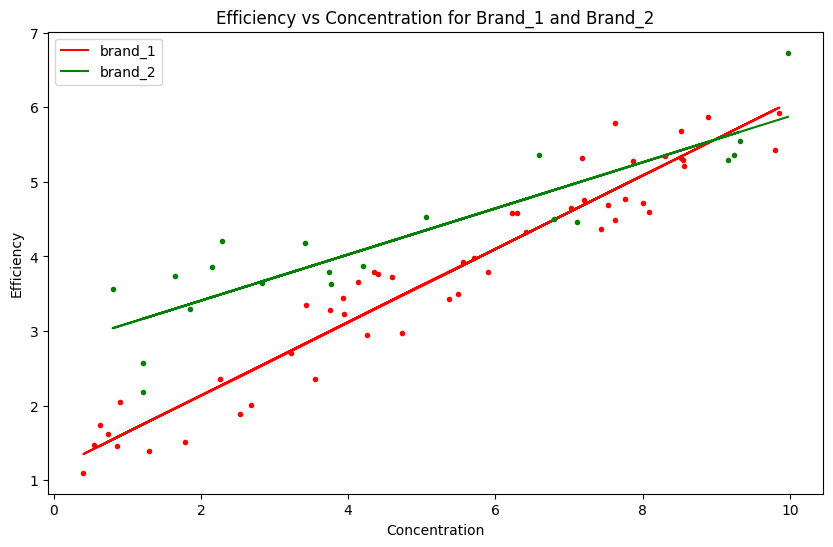

In [256]:
# Séparer les données par marque
brand_1 = dataframe[dataframe['Brand'] == 'Brand_1']
brand_2 = dataframe[dataframe['Brand'] == 'Brand_2']
x1 = np.array(brand_1['Concentration'])
y1 = np.array(brand_1['Efficiency'])
x2 = np.array(brand_2['Concentration'])
y2 = np.array(brand_2['Efficiency'])

# Création de la regression linéaire pour brand_1
lr1 = LinearRegression()
lr1.fit(x1[:, np.newaxis], y1)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
lr2 = LinearRegression()
lr2.fit(x2[:, np.newaxis], y2)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    
# Création de la figure et des axes
plt.figure(figsize=(10, 6))

# representation du resultat
plt.plot(x1, y1, 'r.')
plt.plot(x1, lr1.predict(x1[:, np.newaxis]), label='brand_1', color='red')
plt.plot(x2, y2, 'g.')
plt.plot(x2, lr2.predict(x2[:, np.newaxis]), label='brand_2', color='green')

# Ajouter des légendes et des titres
plt.title('Efficiency vs Concentration for Brand_1 and Brand_2')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()

# Afficher le graphique
plt.show()

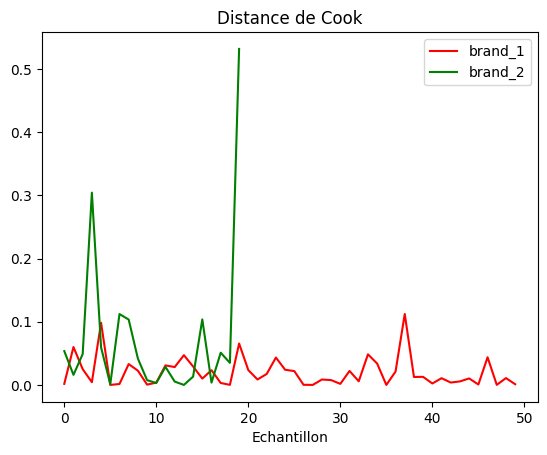

In [257]:
# Etude des outliers
def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)

def cook(x, y, i):
    lr = LinearRegression()
    xx = np.concatenate((x[:i], x[i+1:]), axis=0)
    yy = np.concatenate((y[:i], y[i+1:]), axis=0)
    lr.fit(xx[:, np.newaxis], yy)
    
    lr_tot = LinearRegression()
    lr_tot.fit(x[:, np.newaxis], y)
    y_tot = lr_tot.predict(x[:, np.newaxis])
    
    y_pred = lr.predict(x[:, np.newaxis])
    SSD = np.sum((y_pred - y_tot)**2)
    s_2 = s2(y_tot, y)
    
    return SSD / (2*s_2)

cook1 = [cook(x1, y1, i) for i in range(len(x1))]
cook2 = [cook(x2, y2, i) for i in range(len(x2))]
plt.plot(cook1, label='brand_1', color='red')
plt.plot(cook2, label='brand_2', color='green')
plt.title('Distance de Cook')
plt.xlabel('Echantillon')
plt.legend()
plt.show()

In [258]:
# Interprétation : 
# On observe 1 outlier pour la marque 2, on le supprime pour avoir des résultats plus précis 

y2_bis = y2
y2_bis[19]=lr2.predict([x2[[19]]])
lr2.fit(x2[:, np.newaxis], y2_bis)

/tmp/ipykernel_870/3806970291.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2_bis[19]=lr2.predict([x2[[19]]])


LinearRegression()

In [259]:
# Pour répondre aux différentes questions, comme nous avons les hypothèses de 
#   - linéarité entre la concentration et le rendement
#   - distribution des erreurs selon une loi normale centrée 
# Nous choississons d'utiliser la régression linéaire ordinaire (OLS) qui permet 
# de donner les p-values directement dans le modèle  pour conclure sur l'effet du 
# produit sur le rendement

# Ajout de la constante pour l'intercept
X1 = sm.add_constant(brand_1['Concentration'])
X2 = sm.add_constant(brand_2['Concentration'])

# Ajuster les modèles de régression linéaire
model_brand_1 = sm.OLS(y1, X1).fit()
model_brand_2 = sm.OLS(y2, X2).fit()

# Afficher les p-values de la concentration pour chaque marque 
print("P-value pour la concentration dans Brand_1 :", model_brand_1.pvalues['Concentration'])
print("P-value pour la concentration dans Brand_2 :", model_brand_2.pvalues['Concentration'])

P-value pour la concentration dans Brand_1 : 9.055795865128234e-30
P-value pour la concentration dans Brand_2 : 9.00318766612333e-08


In [260]:
# Interprétation : 
# La p-value est bien inférieure à 0.05 ce qui indique que l'effet de la concentration 
# du produit est significative dans le rendement du moteur. Cela signifie que le 
# produit a bien un effet significatif sur le rendement du moteur.

In [261]:
import statsmodels.formula.api as smf
# On modélise la régression linéaire multiple avec la marque et la concentration
model_full = smf.ols('Efficiency ~ Concentration + Brand', data=dataframe).fit()

# Résumé du modèle
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     237.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.05e-31
Time:                        01:21:26   Log-Likelihood:                -45.184
No. Observations:                  70   AIC:                             96.37
Df Residuals:                      67   BIC:                             103.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4674      0.126  

In [262]:
# Interprétation : 
# Brand[T.Brand_2] (0.000) : La p-valeur associée à la marque Brand_2 est très faible (0.000). 
# Cela signifie que l'effet de la marque Brand_2 sur l'efficacité est statistiquement 
# significatif par rapport à Brand_1. 
# Cela signifie que la marque du moteur modifie l'effet qu'a le produit sur le rendement.